<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [140]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt 

<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [142]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [143]:
df = pd.read_csv(path)

In [144]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [145]:
df.head(5)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [146]:
column_names = ['age','gender','bmi','no_of_children','smoker','region','charges']
#df = pd.DataFrame(df, columns=column_names)

df.columns = column_names

In [147]:
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [148]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [149]:
df.replace('?', np.nan, inplace = True)

<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [151]:

mean_age = df['age'].astype('float').mean(axis=0)
df['age']= df['age'].fillna(mean_age)

In [152]:
df['age'].dtype
df.head(10)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [153]:
df['smoker'].fillna(df['smoker'].mode()[0], inplace = True)
df['smoker'].dtype

C:\Users\tifpa\AppData\Local\Temp\ipykernel_14672\3013211204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].fillna(df['smoker'].mode()[0], inplace = True)


dtype('O')

In [154]:
df[['age','smoker']] = df[['age','smoker']].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [155]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,0,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [156]:
df['charges'] = df['charges'].round(2)

In [157]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(10.0, 54.9885)

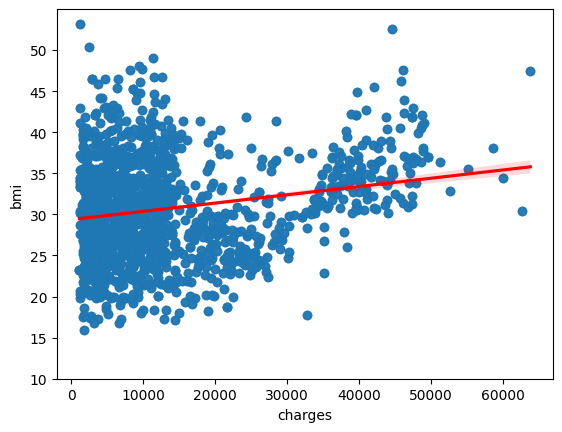

In [158]:
sns.regplot(x='charges',y='bmi', data=df, line_kws={'color':'red'})
plt.ylim(10,)

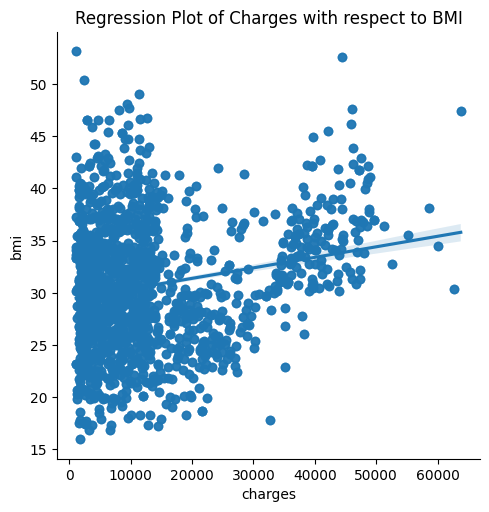

In [159]:
sns.lmplot(x='charges', y='bmi', data = df)
plt.title('Regression Plot of Charges with respect to BMI')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


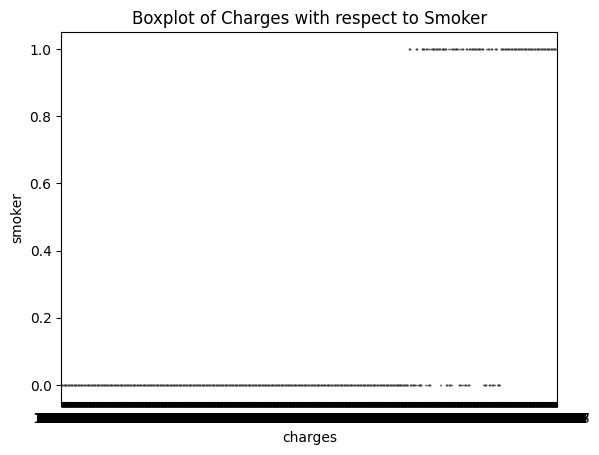

In [160]:
sns.boxplot (x='charges', y='smoker', data=df )
plt.title('Boxplot of Charges with respect to Smoker')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


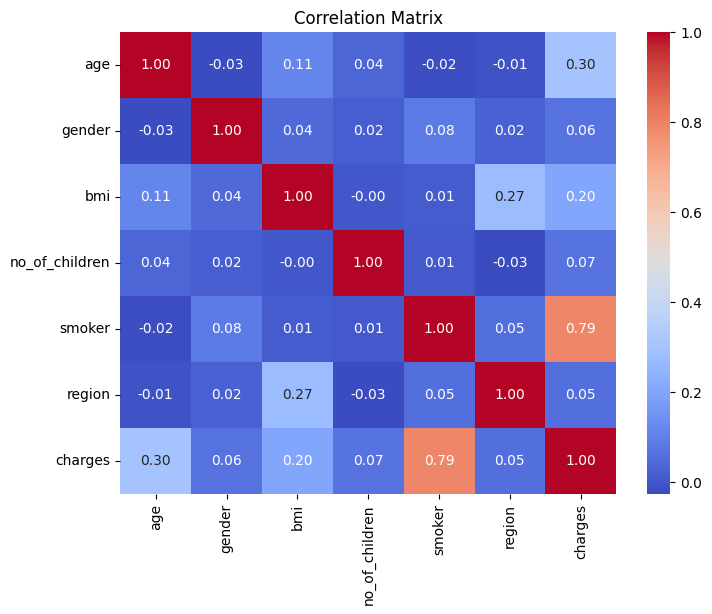

In [161]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


In [162]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [176]:
x = df[['smoker']]
y = df[['charges']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f'R2 score is {r2}')

R2 score is 0.5994005487558922


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [178]:
x = df[['age','gender','bmi','no_of_children','smoker','region']]
y = df[['charges']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f'R2 score is {r2}')

R2 score is 0.7281712375412746


<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


In [182]:
df.head(20)


,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [187]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head(20)

,age,gender,bmi,no_of_children,smoker,region,charges
0,-1.500179,0.985312,0.500495,-0.084083,-0.504957,1.273756,-0.949220
1,-0.789763,0.985312,0.374867,1.562515,-0.504957,1.273756,-0.725059
2,-0.434556,0.985312,-1.304793,-0.907382,-0.504957,-1.379397,0.717965
3,-0.505597,0.985312,-0.297323,-0.907382,-0.504957,-1.379397,-0.773003
4,-0.576639,-1.014907,-0.809624,-0.907382,-0.504957,1.273756,-0.782075
5,0.488984,-1.014907,0.446654,-0.084083,-0.504957,1.273756,-0.413072
6,-0.150390,-1.014907,-0.483318,1.562515,-0.504957,-1.379397,-0.491998
7,-0.150390,0.985312,-0.142328,0.739216,-0.504957,-0.495013,-0.564014
8,1.483565,-1.014907,-0.793308,-0.907382,-0.504957,-1.379397,1.288975
9,-1.002888,0.985312,-0.731310,-0.907382,-0.504957,-0.495013,-0.867274


In [203]:
poly = PolynomialFeatures(degree=2, include_bias=False)

type(poly)

x_poly = poly.fit_transform(x)

type(x_poly)

print(x_poly)

poly_feature_names = poly.get_feature_names_out()

poly_df = pd.DataFrame(x_poly, columns=poly_feature_names)

poly_df.head(20)


[[18.     2.    33.77  ...  0.     0.    16.   ]
 [28.     2.    33.    ...  0.     0.    16.   ]
 [33.     2.    22.705 ...  0.     0.     1.   ]
 ...
 [19.     2.    26.03  ...  1.     1.     1.   ]
 [23.     2.    18.715 ...  0.     0.     1.   ]
 [54.     2.    31.6   ...  0.     0.     9.   ]]


,age,gender,bmi,no_of_children,smoker,region,age^2,age gender,age bmi,age no_of_children,...,bmi^2,bmi no_of_children,bmi smoker,bmi region,no_of_children^2,no_of_children smoker,no_of_children region,smoker^2,smoker region,region^2
0,18.0,2.0,33.770,1.0,0.0,4.0,324.0,36.0,607.860,18.0,...,1140.412900,33.77,0.00,135.080,1.0,0.0,4.0,0.0,0.0,16.0
1,28.0,2.0,33.000,3.0,0.0,4.0,784.0,56.0,924.000,84.0,...,1089.000000,99.00,0.00,132.000,9.0,0.0,12.0,0.0,0.0,16.0
2,33.0,2.0,22.705,0.0,0.0,1.0,1089.0,66.0,749.265,0.0,...,515.517025,0.00,0.00,22.705,0.0,0.0,0.0,0.0,0.0,1.0
3,32.0,2.0,28.880,0.0,0.0,1.0,1024.0,64.0,924.160,0.0,...,834.054400,0.00,0.00,28.880,0.0,0.0,0.0,0.0,0.0,1.0
4,31.0,1.0,25.740,0.0,0.0,4.0,961.0,31.0,797.940,0.0,...,662.547600,0.00,0.00,102.960,0.0,0.0,0.0,0.0,0.0,16.0
5,46.0,1.0,33.440,1.0,0.0,4.0,2116.0,46.0,1538.240,46.0,...,1118.233600,33.44,0.00,133.760,1.0,0.0,4.0,0.0,0.0,16.0
6,37.0,1.0,27.740,3.0,0.0,1.0,1369.0,37.0,1026.380,111.0,...,769.507600,83.22,0.00,27.740,9.0,0.0,3.0,0.0,0.0,1.0
7,37.0,2.0,29.830,2.0,0.0,2.0,1369.0,74.0,1103.710,74.0,...,889.828900,59.66,0.00,59.660,4.0,0.0,4.0,0.0,0.0,4.0
8,60.0,1.0,25.840,0.0,0.0,1.0,3600.0,60.0,1550.400,0.0,...,667.705600,0.00,0.00,25.840,0.0,0.0,0.0,0.0,0.0,1.0
9,25.0,2.0,26.220,0.0,0.0,2.0,625.0,50.0,655.500,0.0,...,687.488400,0.00,0.00,52.440,0.0,0.0,0.0,0.0,0.0,4.0


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


In [204]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=43)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f'R2 score is {r2}')

R2 score is 0.8227023700672583


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [209]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f'R2 score is {r2}')



R2 score is 0.8227121488676805


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
